In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [39]:

#YOUR IMAGE FILE
dataSet ='fruits-360'

# Use os.listdire to check image folder
os.listdir('./fruits-360/Training/')

['Tomato 4',
 'Apple Red Delicious',
 'Tomato 3',
 'Huckleberry',
 'Melon Piel de Sapo',
 'Pear',
 'Cherry 1',
 'Strawberry',
 'Avocado',
 'Tomato 2',
 'Pomegranate',
 'Dates',
 'Carambula',
 '.DS_Store',
 'Granadilla',
 'Tamarillo',
 'Kiwi',
 'Cherry Wax Yellow',
 'Lemon',
 'Guava',
 'Apple Golden 2',
 'Apple Red 1',
 'Mandarine',
 'Quince',
 'Strawberry Wedge',
 'Pear Monster',
 'Raspberry',
 'Pitahaya Red',
 'Apple Golden 3',
 'Grape Pink',
 'Banana Red',
 'Physalis',
 'Cherry Rainier',
 'Maracuja',
 'Plum',
 'Nectarine',
 'Cherry Wax Black',
 'Cantaloupe 2',
 'Lychee',
 'Clementine',
 'Cherry 2',
 'Pineapple Mini',
 'Rambutan',
 'Grape White',
 'Apple Braeburn',
 'Tomato Maroon',
 'Mango',
 'Cocos',
 'Mulberry',
 'Avocado ripe',
 'Tomato 1',
 'Passion Fruit',
 'Apple Granny Smith',
 'Kumquats',
 'Grape White 2',
 'Apricot',
 'Limes',
 'Apple Red Yellow',
 'Pear Williams',
 'Salak',
 'Grapefruit Pink',
 'Apple Golden 1',
 'Banana',
 'Apple Red 2',
 'Physalis with Husk',
 'Lemon Meye

In [3]:
batch_size = 4000
epochs = 10
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [6]:
train_dir = './fruits-360/Training/'
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical') 

Found 41322 images belonging to 81 classes.


In [28]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 13877 images belonging to 81 classes.


In [4]:
total_train = 41322
total_validation = 13877

In [8]:
sample_training_images, _ = next(train_data_gen)

In [10]:
img_tmp = sample_training_images[:1]
img_tmp[0]

array([[[0.9960785 , 1.        , 1.        ],
        [0.98823535, 1.        , 1.        ],
        [0.98823535, 1.        , 0.9921569 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823535, 1.        , 1.        ],
        [1.        , 1.        , 0.9921569 ],
        [1.        , 1.        , 0.9803922 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823535, 1.        , 1.        ],
        [1.        , 1.        , 0.9843138 ],
        [1.        , 0.9960785 , 0.9725491 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

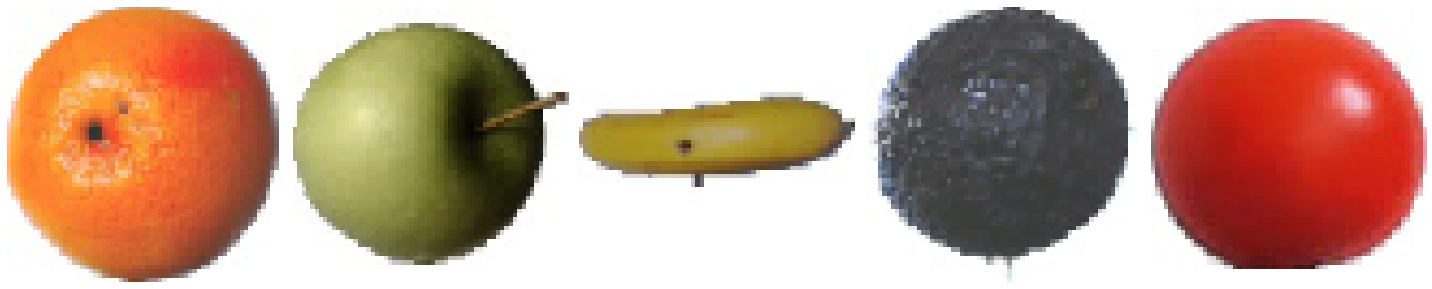

In [32]:
plotImages(sample_training_images[:5])

In [13]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(81, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 81)                4

In [16]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_validation // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 3 steps
Epoch 1/10
10/10 [==============================] - 103s 10s/step - loss: 0.6992 - accuracy: 0.9876 - val_loss: 0.6992 - val_accuracy: 0.9876
Epoch 2/10
10/10 [==============================] - 96s 10s/step - loss: 0.6991 - accuracy: 0.9876 - val_loss: 0.6990 - val_accuracy: 0.9878
Epoch 3/10
10/10 [==============================] - 101s 10s/step - loss: 0.6989 - accuracy: 0.9875 - val_loss: 0.6988 - val_accuracy: 0.9880
Epoch 4/10
10/10 [==============================] - 91s 9s/step - loss: 0.6990 - accuracy: 0.9867 - val_loss: 0.6990 - val_accuracy: 0.9867
Epoch 5/10
10/10 [==============================] - 89s 9s/step - loss: 0.6992 - accuracy: 0.9840 - val_loss: 0.6991 - val_accuracy: 0.9873
Epoch 6/10
10/10 [==============================] - 89s 9s/step - loss: 0.6990 - accuracy: 0.9878 - val_loss: 0.6990 - val_accur

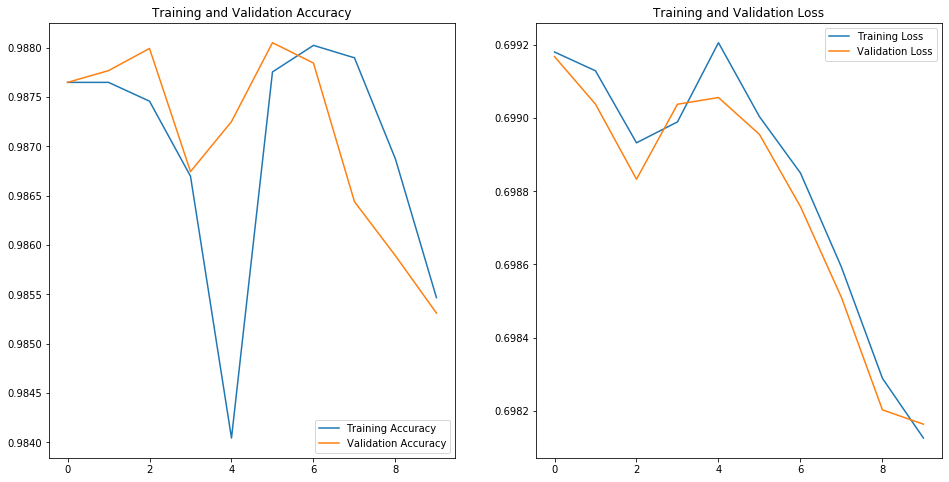

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
class_names = [ Apples (different varieties: Golden, Golden-Red, Granny Smith, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red), Cactus fruit, Cantaloupe (2 varieties), Carambula, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Clementine, Cocos, Dates, Granadilla, Grape (Pink, White, White2), Grapefruit (Pink, White), Guava, Huckleberry, Kiwi, Kaki, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine, Orange, Papaya, Passion fruit, Peach, Pepino, Pear (different varieties, Abate, Monster, Williams), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum, Pomegranate, Quince, Rambutan, Raspberry, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Walnut.

In [42]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.1.0


In [43]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [47]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 544/1000 [===============>..............] - ETA: 0s - loss: 1.5779 - accuracy: 0.5368
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 511us/sample - loss: 1.2244 - accuracy: 0.6370 - val_loss: 0.6974 - val_accuracy: 0.8010
Epoch 2/10
 640/1000 [==================>...........] - ETA: 0s - loss: 0.4251 - accuracy: 0.8813
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 195us/sample - loss: 0.4272 - accuracy: 0.8810 - val_loss: 0.5403 - val_accuracy: 0.8290
Epoch 3/10
 512/1000 [==============>...............] - ETA: 0s - loss: 0.2752 - accuracy: 0.9297
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 184us/sample - loss: 0.2913 - accuracy: 0.9210 - val_loss: 0.4821 - val_accuracy: 0.8300
Epoch 4/10
 672/1000 [===================>..........] - ETA: 0s - loss: 0.1877 - accuracy: 0.9539
Epoch

In [49]:
ls {checkpoint_dir}

checkpoint                   cp.ckpt.index
cp.ckpt.data-00000-of-00001


In [50]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 2.3220 - accuracy: 0.1020
Untrained model, accuracy: 10.20%


In [51]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 0.4179 - accuracy: 0.8740
Restored model, accuracy: 87.40%


In [52]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_images, 
          train_labels,
          epochs=50, 
          callbacks=[cp_callback],
          validation_data=(test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [53]:
ls {checkpoint_dir}

checkpoint                        cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001  cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index                cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001  cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index                cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001  cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index                cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001  cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index                cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001  cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index                cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [54]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'